In [1]:
import pandas as pd

In [12]:
df = pd.read_csv("train.csv")
X = df.drop(columns=["Survived"]) # features
y = df["Survived"] # label

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.figure(figsize=(13,4))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation")
    plt.figlegend(loc = 'upper left')

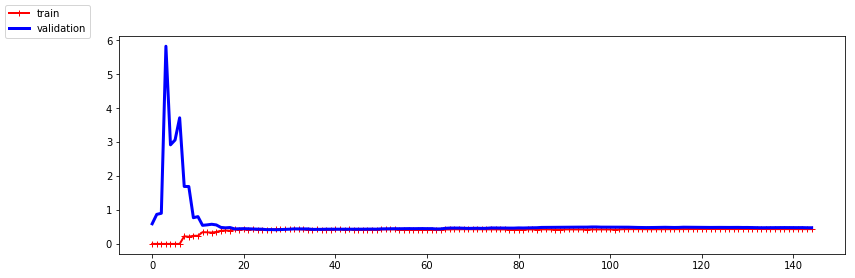

In [50]:
from sklearn.linear_model import LinearRegression
plot_learning_curves(LinearRegression(), X, y)

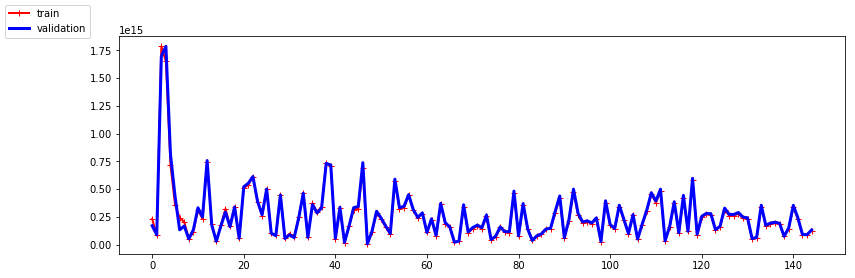

In [62]:
from sklearn.linear_model import SGDRegressor
plot_learning_curves(SGDRegressor(max_iter=80, tol=0.1), X, y)